<a href="https://colab.research.google.com/github/killerkiemklan/Data-Mining-24-25/blob/main/cleaning_and_partitioning(more).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

plan:

split numericals from categoricals,

reduce feature amounts in preferences and shopping,

improve silhouette overall and find ideal model

In [29]:
import pandas as pd

In [30]:
df = pd.read_csv('data_clean.csv')

In [31]:
pd.set_option('display.max_columns', None)
df

,Unnamed: 0,vendor_count,product_count,is_chain,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken_Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle_Dishes,CUI_OTHER,CUI_Street_Food/Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,Total_Orders_Per_Client,mnt,mnt_Per_Order,Items_Per_Order,frq,rcn,activity,Loyalty,Age_Group,CLV_Score,Orders_Night,Orders_Dawn,Orders_Morning,Orders_Afternoon,Orders_Evening,Orders_Dusk,RFM_Score,customer_region_0,customer_region_1,customer_region_2,customer_region_3
0,0,2.0,5.0,1.0,1,2,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,28.88,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,2.0,28.88,14.440,2.25,1.000000,90.0,2.0,0.0,1,0.092846,0,0,0,0,2,0,2.65,0.0,1.0,0.0,0.0
1,1,2.0,2.0,2.0,2,2,12.82,6.39,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,2.0,19.21,9.600,1.00,1.000000,90.0,2.0,0.0,0,0.090596,0,0,2,0,0,0,2.35,0.0,0.0,0.0,1.0
2,2,1.0,2.0,2.0,2,0,9.20,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,2.0,9.20,4.600,1.00,1.000000,90.0,2.0,0.5,3,0.088267,0,0,2,0,0,0,2.05,0.0,0.0,1.0,0.0
3,3,2.0,3.0,1.0,1,2,0.00,13.70,0.00,0.0,0.0,0.0,0.00,0.0,17.86,0.00,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,2.0,31.56,15.780,1.50,0.666667,89.0,3.0,0.0,2,0.066010,0,0,1,1,0,0,2.65,0.0,0.0,1.0,0.0
4,4,2.0,5.0,0.0,0,2,14.57,40.87,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,2.0,55.44,24.695,2.25,0.666667,89.0,3.0,0.0,1,0.071566,0,0,2,0,0,0,2.95,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31732,31883,1.0,1.0,1.0,3,2,0.00,0.00,18.04,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1.0,18.04,18.040,1.00,1.000000,0.0,1.0,0.0,2,0.186393,0,0,0,1,0,0,3.40,0.0,0.0,0.0,1.0
31733,31884,1.0,1.0,0.0,1,2,18.04,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1.0,18.04,18.040,1.00,1.000000,0.0,1.0,0.0,2,0.186393,0,0,0,0,1,0,3.40,0.0,0.0,0.0,1.0
31734,31885,1.0,1.0,1.0,0,2,0.00,0.00,0.00,0.0,0.0,0.0,17.79,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1.0,17.79,17.790,1.00,1.000000,0.0,1.0,0.0,1,0.186393,0,1,0,0,0,0,3.40,0.0,0.0,0.0,1.0
31735,31886,1.0,1.0,0.0,2,2,0.00,12.03,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1.0,12.03,12.030,1.00,1.000000,0.0,1.0,0.0,2,0.186393,0,0,1,0,0,0,3.10,0.0,0.0,0.0,1.0


In [32]:
df_copy = df.copy()
df_copy = df_copy.drop(columns=['Unnamed: 0'])
categorical_cols = ['last_promo', 'payment_method', 'customer_region_0', 'customer_region_1', 'customer_region_2', 'customer_region_3']
cat_df = df_copy[categorical_cols].copy()
numerical_cols = df_copy.columns.difference(categorical_cols)
num_df = df_copy[numerical_cols].copy()

In [33]:
num_df

,Age_Group,CLV_Score,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken_Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle_Dishes,CUI_OTHER,CUI_Street_Food/Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,Items_Per_Order,Loyalty,Orders_Afternoon,Orders_Dawn,Orders_Dusk,Orders_Evening,Orders_Morning,Orders_Night,RFM_Score,Total_Orders_Per_Client,activity,frq,is_chain,mnt,mnt_Per_Order,product_count,rcn,vendor_count
0,1,0.092846,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,28.88,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,2.25,0.0,0,0,0,2,0,0,2.65,2.0,2.0,1.000000,1.0,28.88,14.440,5.0,90.0,2.0
1,0,0.090596,12.82,6.39,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,1.00,0.0,0,0,0,0,2,0,2.35,2.0,2.0,1.000000,2.0,19.21,9.600,2.0,90.0,2.0
2,3,0.088267,9.20,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,1.00,0.5,0,0,0,0,2,0,2.05,2.0,2.0,1.000000,2.0,9.20,4.600,2.0,90.0,1.0
3,2,0.066010,0.00,13.70,0.00,0.0,0.0,0.0,0.00,0.0,17.86,0.00,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,1.50,0.0,1,0,0,0,1,0,2.65,2.0,3.0,0.666667,1.0,31.56,15.780,3.0,89.0,2.0
4,1,0.071566,14.57,40.87,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,2.25,0.0,0,0,0,0,2,0,2.95,2.0,3.0,0.666667,0.0,55.44,24.695,5.0,89.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31732,2,0.186393,0.00,0.00,18.04,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1.00,0.0,1,0,0,0,0,0,3.40,1.0,1.0,1.000000,1.0,18.04,18.040,1.0,0.0,1.0
31733,2,0.186393,18.04,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1.00,0.0,0,0,0,1,0,0,3.40,1.0,1.0,1.000000,0.0,18.04,18.040,1.0,0.0,1.0
31734,1,0.186393,0.00,0.00,0.00,0.0,0.0,0.0,17.79,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1.00,0.0,0,1,0,0,0,0,3.40,1.0,1.0,1.000000,1.0,17.79,17.790,1.0,0.0,1.0
31735,2,0.186393,0.00,12.03,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1.00,0.0,0,0,0,0,1,0,3.10,1.0,1.0,1.000000,0.0,12.03,12.030,1.0,0.0,1.0


In [34]:
# Calculate the Spearman correlation matrix
spearman_corr = num_df.corr(method='spearman')

# Display the correlation matrix
spearman_corr



,Age_Group,CLV_Score,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken_Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle_Dishes,CUI_OTHER,CUI_Street_Food/Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,Items_Per_Order,Loyalty,Orders_Afternoon,Orders_Dawn,Orders_Dusk,Orders_Evening,Orders_Morning,Orders_Night,RFM_Score,Total_Orders_Per_Client,activity,frq,is_chain,mnt,mnt_Per_Order,product_count,rcn,vendor_count
Age_Group,1.000000,0.008029,0.005723,0.003923,-0.005109,0.005333,-0.002110,0.002340,-0.005886,0.008266,-0.002564,0.003228,-0.006198,0.002167,0.001896,-0.000755,-0.000782,0.014155,0.002188,0.002543,0.008337,-0.002040,-0.002210,0.003904,0.003364,0.009922,0.006926,-0.002274,0.001361,0.001311,-0.001494,0.000482,0.012170,0.008039,0.006400,-0.003050,0.004309,0.007902,0.002042,0.008210,-0.012532,0.003960
CLV_Score,0.008029,1.000000,0.009025,0.074601,-0.011513,0.059109,-0.044897,0.007215,0.028317,0.028893,0.017270,0.003967,0.042438,-0.021215,0.015072,0.068899,0.017729,0.041674,0.052926,0.063361,0.094587,0.100607,0.016857,-0.004533,0.125428,-0.019965,0.008237,0.043632,-0.022636,-0.041549,0.050462,0.036009,0.713387,-0.106557,-0.183989,0.574515,-0.086399,0.119323,0.223013,-0.043445,-0.406842,-0.107176
CUI_American,0.005723,0.009025,1.000000,0.007332,-0.015387,0.065179,-0.000643,-0.010538,0.010316,0.003491,0.003923,0.057667,0.043318,-0.029172,0.026228,0.012435,0.029675,0.174074,0.175870,0.178959,0.189133,0.197675,0.187075,0.184536,0.031683,0.151400,0.169882,0.084221,0.086375,0.151380,0.187600,0.118107,0.162228,0.338085,0.296255,-0.105781,0.330598,0.280952,-0.013398,0.309508,-0.171845,0.351875
CUI_Asian,0.003923,0.074601,0.007332,1.000000,0.034078,-0.012756,-0.103489,-0.015550,0.075037,0.010005,-0.096040,-0.167585,0.040372,-0.082444,-0.131623,0.130413,-0.060153,0.162734,0.157037,0.156814,0.138672,0.104094,0.112397,0.118334,0.182380,0.045344,0.014751,0.344037,-0.053403,-0.149691,0.244490,0.328527,0.261421,0.252635,0.213526,-0.084808,0.094222,0.454214,0.339130,0.279956,-0.157729,0.297233
CUI_Beverages,-0.005109,-0.011513,-0.015387,0.034078,1.000000,-0.042555,0.094204,0.081135,0.098443,-0.008512,-0.034951,-0.143470,-0.000907,0.094591,0.009404,0.050634,-0.030654,0.127943,0.124477,0.115184,0.113511,0.099975,0.102991,0.093854,0.059450,0.000509,0.109414,0.208893,0.114618,-0.043844,0.145186,0.128476,0.074481,0.198629,0.171857,-0.058217,0.265690,0.135800,-0.060123,0.193098,-0.085882,0.250485
CUI_Cafe,0.005333,0.059109,0.065179,-0.012756,-0.042555,1.000000,-0.009093,-0.000914,-0.016337,0.105053,0.062099,0.121947,0.062444,-0.008576,0.131633,-0.049492,0.083459,0.114885,0.114361,0.116879,0.125629,0.117237,0.103285,0.118858,0.040379,0.111052,0.123698,0.030773,0.023953,0.144162,0.179790,-0.063906,0.125083,0.171584,0.135666,0.006320,0.165666,0.141881,-0.030471,0.167178,-0.103567,0.173375
CUI_Chicken_Dishes,-0.002110,-0.044897,-0.000643,-0.103489,0.094204,-0.009093,1.000000,0.157234,0.025076,-0.012814,0.081248,-0.035988,0.008776,0.210156,0.177586,-0.063354,0.046587,0.137344,0.133062,0.134775,0.132748,0.127351,0.125016,0.132129,0.012387,0.068544,0.179475,-0.107102,0.249155,0.233228,0.075279,-0.062044,0.009108,0.219054,0.183155,-0.036839,0.297081,-0.027078,-0.334315,0.200558,-0.091091,0.247379
CUI_Chinese,0.002340,0.007215,-0.010538,-0.015550,0.081135,-0.000914,0.157234,1.000000,0.026401,0.011930,-0.000944,-0.054318,0.050209,0.215469,0.126193,-0.021589,0.026105,0.137257,0.145548,0.141348,0.140331,0.126429,0.132369,0.148394,0.077362,0.079259,0.146449,-0.000133,0.168401,0.156189,0.115020,0.023641,0.089876,0.229416,0.185766,-0.024667,0.232578,0.095172,-0.167759,0.228505,-0.109997,0.251667
CUI_Desserts,-0.005886,0.028317,0.010316,0.075037,0.098443,-0.016337,0.025076,0.026401,1.000000,0.009390,-0.023756,-0.090356,0.012118,0.007400,-0.023845,0.085192,-0.029708,0.079590,0.077414,0.083423,0.075318,0.058157,0.069065,0.076604,0.045257,-0.010637,0.081983,0.170041,0.031799,-0.053549,0.109716,0.100097,0.08

In [35]:
# Calculate correlation matrix
corr_matrix = num_df.corr(method='spearman')

# Get correlations above 0.5 (excluding self-correlations)
strong_corrs = [(i, j, corr_matrix.loc[i, j])
                for i in corr_matrix.index
                for j in corr_matrix.columns
                if abs(corr_matrix.loc[i, j]) > 0.7 and i < j]

# Print sorted results
print("Correlations above 0.5:")
for var1, var2, corr in sorted(strong_corrs, key=lambda x: abs(x[2]), reverse=True):
    print(f"{var1} - {var2}: {corr:.3f}")

Correlations above 0.5:
Total_Orders_Per_Client - product_count: 0.947
Total_Orders_Per_Client - vendor_count: 0.886
product_count - vendor_count: 0.842
Total_Orders_Per_Client - activity: 0.832
mnt - product_count: 0.795
activity - product_count: 0.784
activity - vendor_count: 0.756
Total_Orders_Per_Client - is_chain: 0.727
activity - frq: -0.718
CLV_Score - RFM_Score: 0.713
is_chain - vendor_count: 0.705


In [36]:
num_df.columns

Index(['Age_Group', 'CLV_Score', 'CUI_American', 'CUI_Asian', 'CUI_Beverages',
       'CUI_Cafe', 'CUI_Chicken_Dishes', 'CUI_Chinese', 'CUI_Desserts',
       'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese',
       'CUI_Noodle_Dishes', 'CUI_OTHER', 'CUI_Street_Food/Snacks', 'CUI_Thai',
       'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6',
       'Items_Per_Order', 'Loyalty', 'Orders_Afternoon', 'Orders_Dawn',
       'Orders_Dusk', 'Orders_Evening', 'Orders_Morning', 'Orders_Night',
       'RFM_Score', 'Total_Orders_Per_Client', 'activity', 'frq', 'is_chain',
       'mnt', 'mnt_Per_Order', 'product_count', 'rcn', 'vendor_count'],
      dtype='object')

In [37]:
value_engagement_metrics = [
    # Value
    'mnt', 'mnt_Per_Order', 'CLV_Score', 'RFM_Score',
    # Engagement
    'activity', 'Loyalty', 'frq', 'rcn' , 'Age_Group']

preference_metrics = [
    # Cuisine preferences
    'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
    'CUI_Chicken_Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
    'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle_Dishes',
    'CUI_OTHER', 'CUI_Street_Food/Snacks', 'CUI_Thai'
]

shopping_behavior_metrics = [
    # Shopping patterns
    'vendor_count', 'product_count', 'is_chain', 'Items_Per_Order',
    # Timing preferences
    'Orders_Night', 'Orders_Dawn', 'Orders_Morning', 'Orders_Afternoon',
    'Orders_Evening', 'Orders_Dusk',
    'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6'
]

demographic_metrics = [
    'customer_region_0', 'customer_region_1', 'customer_region_2',
    'customer_region_3'
]

"""Loyalty
        Age_Group, i dropped these from value
"""

In [38]:
df_val = num_df[value_engagement_metrics].copy()
df_pref = num_df[preference_metrics].copy()
df_shop = num_df[shopping_behavior_metrics].copy()


time to reduce feature amount to label data better

In [39]:
print(f"Number of columns in df_pref: {df_pref.shape[1]}")
print(f"Number of columns in df_shop: {df_shop.shape[1]}")
print(f"Number of columns in df_val: {df_val.shape[1]}")

Number of columns in df_pref: 15
Number of columns in df_shop: 17
Number of columns in df_val: 9


In [40]:
cuisine_groups = {
    'Other_Asian': ['CUI_Chinese', 'CUI_Japanese', 'CUI_Noodle_Dishes','CUI_Thai', 'CUI_Indian'],
    'General_Asian' : ['CUI_Asian'],
    'Western': ['CUI_American', 'CUI_Italian'],
    'Beverages_Cafe': ['CUI_Beverages', 'CUI_Cafe'],
    'Desserts_Snacks': ['CUI_Desserts', 'CUI_Street_Food/Snacks'],
    'Main_Dishes': ['CUI_Chicken_Dishes', 'CUI_Healthy', 'CUI_OTHER']
}

# Calculate group totals and percentages
group_totals = {}
total_sum = 0

for group, cuisines in cuisine_groups.items():
    group_sum = num_df[cuisines].sum().sum()
    group_totals[group] = group_sum
    total_sum += group_sum

# Print results
print("Group Totals and Percentages:")
for group, total in group_totals.items():
    percentage = (total / total_sum) * 100
    print(f"{group:15s}: {total:8.0f} ({percentage:5.1f}%)")

print(f"\nTotal Sum:      {total_sum:8.0f}")

Group Totals and Percentages:
Other_Asian    :   242685 ( 19.9%)
General_Asian  :   317325 ( 26.0%)
Western        :   258568 ( 21.2%)
Beverages_Cafe :    98803 (  8.1%)
Desserts_Snacks:   152844 ( 12.5%)
Main_Dishes    :   150454 ( 12.3%)

Total Sum:       1220680


In [41]:
# Create copy
pref_clean = df_pref.copy()

# Initialize new columns for each group
group_columns = {
    'Other_Asian': ['CUI_Chinese', 'CUI_Japanese', 'CUI_Noodle_Dishes', 'CUI_Thai', 'CUI_Indian'],
    'General_Asian': ['CUI_Asian'],
    'Western': ['CUI_American', 'CUI_Italian'],
    'Beverages_Cafe': ['CUI_Beverages', 'CUI_Cafe'],
    'Desserts_Snacks': ['CUI_Desserts', 'CUI_Street_Food/Snacks'],
    'Main_Dishes': ['CUI_Chicken_Dishes', 'CUI_Healthy', 'CUI_OTHER']
}

# Create grouped columns
for group, cuisines in group_columns.items():
    pref_clean[group] = df_pref[cuisines].sum(axis=1)

# Keep only the new grouped columns
pref_clean = pref_clean[list(group_columns.keys())]

In [42]:
pref_clean

,Other_Asian,General_Asian,Western,Beverages_Cafe,Desserts_Snacks,Main_Dishes
0,28.88,0.00,0.00,0.00,0.00,0.0
1,0.00,6.39,12.82,0.00,0.00,0.0
2,0.00,0.00,9.20,0.00,0.00,0.0
3,17.86,13.70,0.00,0.00,0.00,0.0
4,0.00,40.87,14.57,0.00,0.00,0.0
...,...,...,...,...,...,...
31732,0.00,0.00,0.00,18.04,0.00,0.0
31733,0.00,0.00,18.04,0.00,0.00,0.0
31734,0.00,0.00,0.00,0.00,17.79,0.0
31735,0.00,12.03,0.00,0.00,0.00,0.0


In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, r2_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# PCA with 95% variance
pca = PCA(n_components=0.8)
X_pca = pca.fit_transform(pref_clean)
print(f"PCA components for 95% variance: {X_pca.shape[1]}")

# Clustering metrics
metrics = []
for k in range(3, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(X_pca)

    # Calculate SSE
    sse = np.sum((X_pca - kmeans.cluster_centers_[labels]) ** 2)

    # Calculate R2
    r2 = r2_score(X_pca, kmeans.cluster_centers_[labels])

    metrics.append({
        'k': k,
        'silhouette': silhouette_score(X_pca, labels),
        'calinski': calinski_harabasz_score(X_pca, labels),
        'davies': davies_bouldin_score(X_pca, labels),
        'inertia': kmeans.inertia_,
        'sse': sse,
        'r2': r2
    })

# Print metrics
for m in metrics:
    print(f"\nk={m['k']}:")
    print(f"Silhouette: {m['silhouette']:.3f}")
    print(f"Calinski-Harabasz: {m['calinski']:.2f}")
    print(f"Davies-Bouldin: {m['davies']:.2f}")
    print(f"SSE: {m['sse']:.2f}")
    print(f"R2: {m['r2']:.3f}")
    print(f"Inertia: {m['inertia']:.2f}")

# T-SNE visualization
best_k = max(metrics, key=lambda x: x['silhouette'])['k']
kmeans_final = KMeans(n_clusters=best_k, init='k-means++', random_state=42)
labels = kmeans_final.fit_predict(X_pca)

tsne = TSNE(random_state=42)
embedding = tsne.fit_transform(X_pca)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# T-SNE plot
scatter = ax1.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='viridis')
ax1.set_title(f'T-SNE visualization of {best_k} clusters')
plt.colorbar(scatter, ax=ax1)

# Elbow plot
ax2.plot(range(3, 11), [m['inertia'] for m in metrics], 'bo-')
ax2.set_xlabel('Number of clusters (k)')
ax2.set_ylabel('Inertia')
ax2.set_title('Elbow Method')

plt.tight_layout()
plt.show()

PCA components for 95% variance: 4


Based on the Silhouette Score, SSE (Elbow Method), and R², the ideal number of clusters for K-means appears to be 4. This provides a good balance between cluster separation, compactness, and simplicity. If you need more granular clusters, you could consider 5 clusters, but beyond that, the clustering quality may decline.

In [44]:
def encode_dow_cyclic(df):
    # Sum weighted DOWs
    dow_value = (df[['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']] *
                np.array([0, 1, 2, 3, 4, 5, 6])).sum(axis=1) / \
                df[['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']].sum(axis=1)

    # Create cyclic encoding
    df['DOW_sin'] = np.sin(2 * np.pi * dow_value/7)
    df['DOW_cos'] = np.cos(2 * np.pi * dow_value/7)

    # Drop original DOW columns
    df.drop(['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6'], axis=1, inplace=True)

    return df

df['basket_segments'] = pd.cut(df['Items_Per_Order'],

    bins=[0, 2, 4, 6, np.inf],

    labels=['small', 'medium', 'large', 'bulk'])

df['product_segments'] = pd.cut(df['product_count'],

    bins=[0, 5, 15, 30, np.inf],

    labels=['minimal', 'standard', 'variety', 'high_variety'])

df['vendor_segments'] = pd.cut(df['vendor_count'],

    bins=[0, 1, 3, 5, np.inf],

    labels=['single', 'few', 'diverse', 'very_diverse'])

df_shop

,vendor_count,product_count,is_chain,Items_Per_Order,Orders_Night,Orders_Dawn,Orders_Morning,Orders_Afternoon,Orders_Evening,Orders_Dusk,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6
0,2.0,5.0,1.0,2.25,0,0,0,0,2,0,1,0,0,0,0,0,1
1,2.0,2.0,2.0,1.00,0,0,2,0,0,0,1,0,0,0,0,0,1
2,1.0,2.0,2.0,1.00,0,0,2,0,0,0,1,0,0,0,0,0,1
3,2.0,3.0,1.0,1.50,0,0,1,1,0,0,0,1,0,0,0,0,1
4,2.0,5.0,0.0,2.25,0,0,2,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31732,1.0,1.0,1.0,1.00,0,0,0,1,0,0,0,0,0,0,0,0,1
31733,1.0,1.0,0.0,1.00,0,0,0,0,1,0,0,0,0,0,0,0,1
31734,1.0,1.0,1.0,1.00,0,1,0,0,0,0,0,0,0,0,0,0,1
31735,1.0,1.0,0.0,1.00,0,0,1,0,0,0,0,0,0,0,0,0,1


In [225]:
df_shop.describe()

,vendor_count,product_count,is_chain,Items_Per_Order,Orders_Night,Orders_Dawn,Orders_Morning,Orders_Afternoon,Orders_Evening,Orders_Dusk,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6
count,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000
mean,2.918581,4.932445,2.252891,1.283130,0.285219,0.331348,1.078394,1.048020,1.336201,0.308851,0.558339,0.570029,0.593503,0.622081,0.680814,0.655796,0.707471
std,2.035818,3.931106,1.952278,0.350075,0.907566,0.946374,2.093201,1.834232,2.336247,0.989525,1.015171,1.045785,1.047444,1.071099,1.089727,1.071256,1.169202
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,3.000000,2.000000,1.166667,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,7.000000,3.000000,1.500000,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,8.000000,14.000000,6.000000,2.250000,20.000000,21.000000,58.000000,42.000000,49.000000,43.000000,16.000000,17.000000,15.000000,17.000000,16.000000,20.000000,20.000000


# MinMax scaling with custom ranges to score

"""Items_Per_Order (1-2.25):

Min 1: Single item is baseline order
Max 2.25: Very few customers order >2 items

product_count (1-14):

Min 1: Customers try at least one product
Max 14: Represents power users with wide product exploration
Aligns with 75th percentile around 7 products

vendor_count (1-8):

Min 1: Single vendor loyalty
Max 8: Reflects realistic maximum vendor relationships
Most customers use 1-3 vendors (75th percentile at 4)
"""

• Replaced log transform with MinMaxScaler for time periods to maintain relative differences on 0-1 scale

• Normalized DOW cyclic features to match 0-1 scale of other features

• Kept is_chain to preserve business context

• Added chain interactions with basket/vendor scores to
capture business patterns

• Unified all features to same scale range to prevent distance calculation skew



In [260]:
def preprocess_shopping_behavior(df_shop, drop_cols=False):
    epsilon = 1e-10
    shop_clean = df_shop.copy()

    # Keep original features that contribute to calculations
    original_features = ['DOW_0', 'DOW_6', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5',
                        'vendor_count', 'product_count', 'is_chain', 'Items_Per_Order',
                        'Orders_Morning', 'Orders_Afternoon', 'Orders_Evening']

    # Main feature computations
    weekday_sum = shop_clean[['DOW_1','DOW_2','DOW_3','DOW_4','DOW_5']].clip(lower=0).sum(axis=1)
    weekend_sum = shop_clean[['DOW_0','DOW_6']].clip(lower=0).sum(axis=1) + epsilon
    shop_clean['weekday_weekend_ratio'] = weekday_sum / weekend_sum

    # Scores
    shop_clean['vendor_score'] = (shop_clean['vendor_count'].clip(lower=1) - 1) / (8 - 1)
    shop_clean['product_score'] = (shop_clean['product_count'].clip(lower=1) - 1) / (14 - 1)
    shop_clean['basket_score'] = (shop_clean['Items_Per_Order'].clip(lower=1) - 1) / (2.25 - 1)

    # Time periods
    shop_clean['daytime_orders'] = shop_clean['Orders_Morning'].clip(lower=0) + shop_clean['Orders_Afternoon'].clip(lower=0)
    shop_clean['evening_orders'] = shop_clean['Orders_Evening'].clip(lower=0)

    # Chain interactions
    shop_clean['chain_vendor_interaction'] = shop_clean['is_chain'].clip(lower=0) * shop_clean['vendor_score']

    if drop_cols:
        shop_clean.drop(columns=original_features, inplace=True)

    return shop_clean

# Example usage
shop_clean = preprocess_shopping_behavior(df_shop, drop_cols=True)

In [336]:

# Create copy and calculate scores
shop_clean = df_shop.copy()
shop_clean['basket_score'] = (shop_clean['Items_Per_Order'] - 1) / (2.25 - 1)
shop_clean['product_score'] = (shop_clean['product_count'] - 1) / (14 - 1)
shop_clean['vendor_score'] = (shop_clean['vendor_count'] - 1) / (8 - 1)

# Group into periods, no scaling
shop_clean['daytime_orders'] = shop_clean['Orders_Morning'] + shop_clean['Orders_Afternoon']
shop_clean['evening_orders'] = shop_clean['Orders_Evening'] + shop_clean['Orders_Dusk']



""""Standard numerical encoding (e.g., Monday = 0, Tuesday = 1, ..., Sunday = 6)
fails to account for the cyclic relationship of the data.
In numerical encoding, Sunday (6) is treated as far from Monday (0),
 which is incorrect for many analyses, such as machine learning tasks where distance or similarity matters."""

# DOW cyclic encoding
dow_value = (df_shop[['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']] *
            np.array([0, 1, 2, 3, 4, 5, 6])).sum(axis=1) / \
            df_shop[['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']].sum(axis=1)

shop_clean['DOW_sin'] = np.sin(2 * np.pi * dow_value/7)
shop_clean['DOW_cos'] = np.cos(2 * np.pi * dow_value/7)
scaler_dow = MinMaxScaler()
shop_clean[['DOW_sin', 'DOW_cos']] = scaler_dow.fit_transform(shop_clean[['DOW_sin', 'DOW_cos']])

# Chain interactions
shop_clean['chain_basket_interaction'] = shop_clean['is_chain'] * shop_clean['basket_score']
shop_clean['chain_vendor_interaction'] = shop_clean['is_chain'] * shop_clean['vendor_score']

# Drop unneeded columns
columns_to_drop = ['vendor_count', 'product_count'] + \
                 [ 'Orders_Morning', 'Orders_Afternoon', 'Orders_Evening', 'Orders_Dusk'] + \
                 ['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6','basket_score', 'DOW_sin', 'DOW_cos', 'chain_basket_interaction' ,'Orders_Dawn'  ,'Orders_Night', 'Items_Per_Order']
shop_clean = shop_clean.drop(columns=columns_to_drop)

In [337]:
shop_clean.describe()

,is_chain,product_score,vendor_score,daytime_orders,evening_orders,chain_vendor_interaction
count,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000
mean,2.252891,0.302496,0.274083,2.126414,1.645052,1.039175
std,1.952278,0.302393,0.290831,3.164254,2.723351,1.653392
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.076923,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.153846,0.142857,1.000000,1.000000,0.285714
75%,3.000000,0.461538,0.428571,3.000000,2.000000,1.142857
max,6.000000,1.000000,1.000000,67.000000,59.000000,6.000000


In [343]:
# Clustering
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
labels = kmeans.fit_predict(shop_clean)

# Calculate metrics
silhouette = silhouette_score(shop_clean, labels)
ch_score = calinski_harabasz_score(shop_clean, labels)
db_score = davies_bouldin_score(shop_clean, labels)
cluster_centers = kmeans.cluster_centers_
r2 = r2_score(shop_clean, cluster_centers[labels])

print(f"Silhouette: {silhouette:.3f}")
print(f"Calinski-Harabasz: {ch_score:.2f}")
print(f"Davies-Bouldin: {db_score:.2f}")
print(f"R-squared: {r2:.3f}")

Silhouette: 0.519
Calinski-Harabasz: 17577.26
Davies-Bouldin: 1.04
R-squared: 0.621


In [344]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
import pandas as pd

def analyze_feature_importance(df):
   # Get cluster labels
   kmeans = KMeans(n_clusters=4, random_state=42)
   labels = kmeans.fit_predict(df)

   # Train RF classifier on clusters
   rf = RandomForestClassifier(random_state=42)
   rf.fit(df, labels)

   # Get feature importance
   importance = pd.DataFrame({
       'feature': df.columns,
       'importance': rf.feature_importances_
   }).sort_values('importance', ascending=False)

   return importance

# Run analysis on preprocessed data
importance = analyze_feature_importance(pref_clean)
print(importance)



           feature  importance
2          Western    0.357267
1    General_Asian    0.309431
0      Other_Asian    0.268077
4  Desserts_Snacks    0.030584
5      Main_Dishes    0.027411
3   Beverages_Cafe    0.007230


In [49]:
!pip install umap.umap_

ERROR: Could not find a version that satisfies the requirement umap.umap_ (from versions: none)
ERROR: No matching distribution found for umap.umap_


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


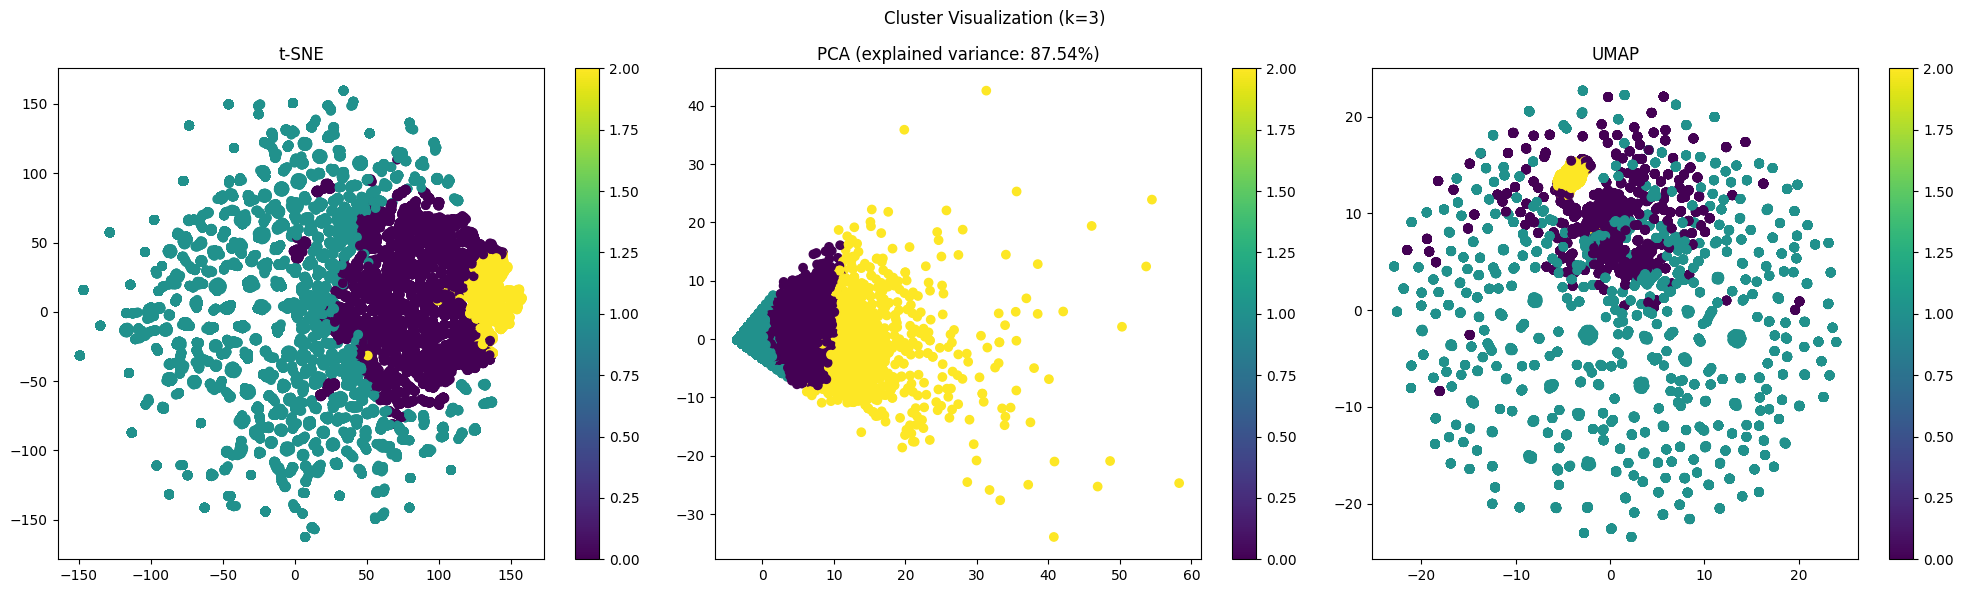

In [348]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, r2_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Clustering metrics
metrics = []
for k in range(3, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(shop_clean)

    # Calculate SSE
    sse = np.sum((shop_clean - kmeans.cluster_centers_[labels]) ** 2)

    # Calculate R2
    r2 = r2_score(shop_clean, kmeans.cluster_centers_[labels])

    metrics.append({
        'k': k,
        'silhouette': silhouette_score(shop_clean, labels),
        'calinski': calinski_harabasz_score(shop_clean, labels),
        'davies': davies_bouldin_score(shop_clean, labels),
        'inertia': kmeans.inertia_,
        'sse': sse,
        'r2': r2
    })

# Print metrics
for m in metrics:
    print(f"\nk={m['k']}:")
    print(f"Silhouette: {m['silhouette']:.3f}")
    print(f"Calinski-Harabasz: {m['calinski']:.2f}")
    print(f"Davies-Bouldin: {m['davies']:.2f}")
    print(f"SSE: {m['sse']:.2f}")
    print(f"R2: {m['r2']:.3f}")
    print(f"Inertia: {m['inertia']:.2f}")

# T-SNE visualization
best_k = max(metrics, key=lambda x: x['silhouette'])['k']
kmeans_final = KMeans(n_clusters=best_k, init='k-means++', random_state=42)
labels = kmeans_final.fit_predict(shop_clean)

tsne = TSNE(random_state=42)
embedding = tsne.fit_transform(shop_clean)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# T-SNE plot
scatter = ax1.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='viridis')
ax1.set_title(f'T-SNE visualization of {best_k} clusters')
plt.colorbar(scatter, ax=ax1)

# Elbow plot
ax2.plot(range(3, 11), [m['inertia'] for m in metrics], 'bo-')
ax2.set_xlabel('Number of clusters (k)')
ax2.set_ylabel('Inertia')
ax2.set_title('Elbow Method')

plt.tight_layout()
plt.show()

KeyboardInterrupt: 

Higher
𝑅
2
R
2
 :

Increasing
𝑘
k naturally reduces the within-cluster variance (SSE/Inertia), thereby increasing the
𝑅
2
R
2
  score.
This happens because clusters become smaller and tighter, explaining more local variance.
Silhouette Score:

If the silhouette score remains reasonable or declines only slightly as
𝑘
k increases, the new clusters might still be meaningful.
However, a sharp drop in the silhouette score suggests that the additional clusters are artificial and may not reflect real structure in the data.
Calinski-Harabasz (CH) and Davies-Bouldin (DB) Indices:

These metrics help assess whether the new clusters are compact and well-separated.
Declining CH scores or worsening DB indices as
𝑘
k increases indicate that the clusters are becoming less meaningful despite a higher
𝑅
2
R
2
 .

In [51]:
df_val.describe()

,mnt,mnt_Per_Order,CLV_Score,RFM_Score,activity,Loyalty,frq,rcn,Age_Group
count,31737.000000,31737.000000,31737.000000,31737.000000,31737.00000,31737.000000,31737.000000,31737.000000,31737.000000
mean,33.267142,9.844285,0.066017,2.508433,36.45061,0.161565,0.347879,26.941015,1.771749
std,26.736028,6.222479,0.040343,0.606241,29.40898,0.228829,0.390181,22.939355,0.791278
min,0.370000,0.370000,0.011496,1.000000,1.00000,0.000000,0.022222,0.000000,0.000000
25%,13.020000,5.070000,0.030806,2.050000,4.00000,0.000000,0.076923,8.000000,1.000000
50%,24.200000,8.220000,0.055885,2.400000,35.00000,0.000000,0.134328,20.000000,2.000000
75%,45.180000,12.920000,0.093041,2.950000,63.00000,0.333333,0.600000,41.000000,2.000000
max,93.420000,24.695000,0.186393,4.000000,91.00000,0.833333,1.384615,90.000000,5.000000


In [138]:
def preprocess_df_val(df):
   # Get original column names from df
   val_clean = df[['mnt', 'activity', 'frq', 'rcn', 'CLV_Score']].copy()

   val_clean['CLV_Score'] = np.log1p(val_clean['CLV_Score'])

   # Enhanced top scorers using original column names
   val_clean['value_retention'] = np.log1p(val_clean['mnt']) / (val_clean['activity'] + 1)
   val_clean['value_growth'] = val_clean['mnt'] / ((val_clean['rcn'] + 1) * (val_clean['frq'] + 1))
   val_clean['value_growth_rate'] = val_clean['value_growth'] * np.log1p(val_clean['frq'])
   val_clean['growth_momentum'] = val_clean['value_growth'] * (val_clean['mnt'] / val_clean['rcn'])

   val_clean['spend_consistency'] = val_clean['mnt'] / (val_clean['rcn'] + 1)
   val_clean['avg_order_value'] = val_clean['mnt'] / (val_clean['frq'] + 1)
   val_clean['active_spend_rate'] = np.log1p(val_clean['mnt'] * val_clean['activity']) / np.log1p(val_clean['rcn'])

  #  val_clean['RFM_Score'] = (np.exp(-0.02 * val_clean['rcn']) * 0.3 +
  #                           np.log1p(val_clean['frq']) * 0.3 +
  #                           np.log2(val_clean['mnt'] + 1) * 0.4)
  #  'RFM_Score',

   final_cols = ['CLV_Score',  'value_retention', 'value_growth', 'value_growth_rate',
                'growth_momentum', 'spend_consistency', 'avg_order_value', 'active_spend_rate']

   val_clean = remove_outliers(val_clean, final_cols)
   val_clean[final_cols] = StandardScaler().fit_transform(val_clean[final_cols])

   return val_clean[final_cols]

In [139]:
# Usage:
val_clean = preprocess_df_val(df_val)

val_clean

,CLV_Score,value_retention,value_growth,value_growth_rate,growth_momentum,spend_consistency,avg_order_value,active_spend_rate
0,0.684665,1.916752,-0.785531,-0.556172,-0.678238,-0.764433,-0.563246,-0.969934
1,0.629458,1.604184,-0.804640,-0.672456,-0.680110,-0.798450,-0.767460,-1.024040
2,0.572190,1.057575,-0.824420,-0.792829,-0.681255,-0.833663,-0.978854,-1.120139
3,0.018639,1.289336,-0.766930,-0.564103,-0.676676,-0.753772,-0.373350,-0.902334
4,0.157898,1.619137,-0.709674,-0.307326,-0.666412,-0.668833,0.231815,-0.826394
...,...,...,...,...,...,...,...,...
31732,2.884836,1.962832,2.134239,2.079300,1.916291,2.126509,-0.792168,2.410954
31733,2.884836,1.962832,2.134239,2.079300,1.916291,2.126509,-0.792168,2.410954
31734,2.884836,1.962832,2.134239,2.079300,1.916291,2.126509,-0.797448,2.410954
31735,2.884836,1.962832,1.320702,2.079300,1.916291,2.126509,-0.919089,2.410954


In [140]:
val_clean.describe()

,CLV_Score,value_retention,value_growth,value_growth_rate,growth_momentum,spend_consistency,avg_order_value,active_spend_rate
count,31737.000000,3.173700e+04,3.173700e+04,3.173700e+04,3.173700e+04,3.173700e+04,3.173700e+04,3.173700e+04
mean,0.000000,-2.865724e-17,2.865724e-17,1.432862e-17,3.582155e-17,-2.722437e-16,2.435865e-16,1.432862e-17
std,1.000016,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00
min,-1.387533,-7.622462e-01,-8.416363e-01,-9.016023e-01,-6.815951e-01,-8.643104e-01,-1.165328e+00,-1.476595e+00
25%,-0.880951,-6.642558e-01,-7.416830e-01,-7.341645e-01,-6.739437e-01,-7.384769e-01,-7.824128e-01,-7.558025e-01
50%,-0.237009,-5.810731e-01,-4.902892e-01,-4.740088e-01,-6.007147e-01,-4.866847e-01,-3.533038e-01,-2.243319e-01
75%,0.689438,3.865792e-01,4.086860e-01,3.912213e-01,3.621503e-01,4.075174e-01,5.170381e-01,5.109001e-01
max,2.884836,1.962832e+00,2.134239e+00,2.079300e+00,1.916291e+00,2.126509e+00,2.466215e+00,2.410954e+00


In [146]:
# Clustering on encoded features
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
labels = kmeans.fit_predict(val_clean)

# Calculate metrics
silhouette = silhouette_score(val_clean, labels)
ch_score = calinski_harabasz_score(val_clean, labels)
db_score = davies_bouldin_score(val_clean, labels)

# Calculate R-squared
# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Calculate R-squared
r2 = r2_score(val_clean, cluster_centers[labels])


print(f"Silhouette: {silhouette:.3f}")
print(f"Calinski-Harabasz: {ch_score:.2f}")
print(f"Davies-Bouldin: {db_score:.2f}")
print(f"R-squared: {r2:.3f}")

Silhouette: 0.544
Calinski-Harabasz: 48547.80
Davies-Bouldin: 0.65
R-squared: 0.754


In [152]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.7 MB/s eta 0:00:00


PCA components for 95% variance: 3
Silhouette: 0.575
Calinski-Harabasz: 58052.61
Davies-Bouldin: 0.58
R-squared: 0.555


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


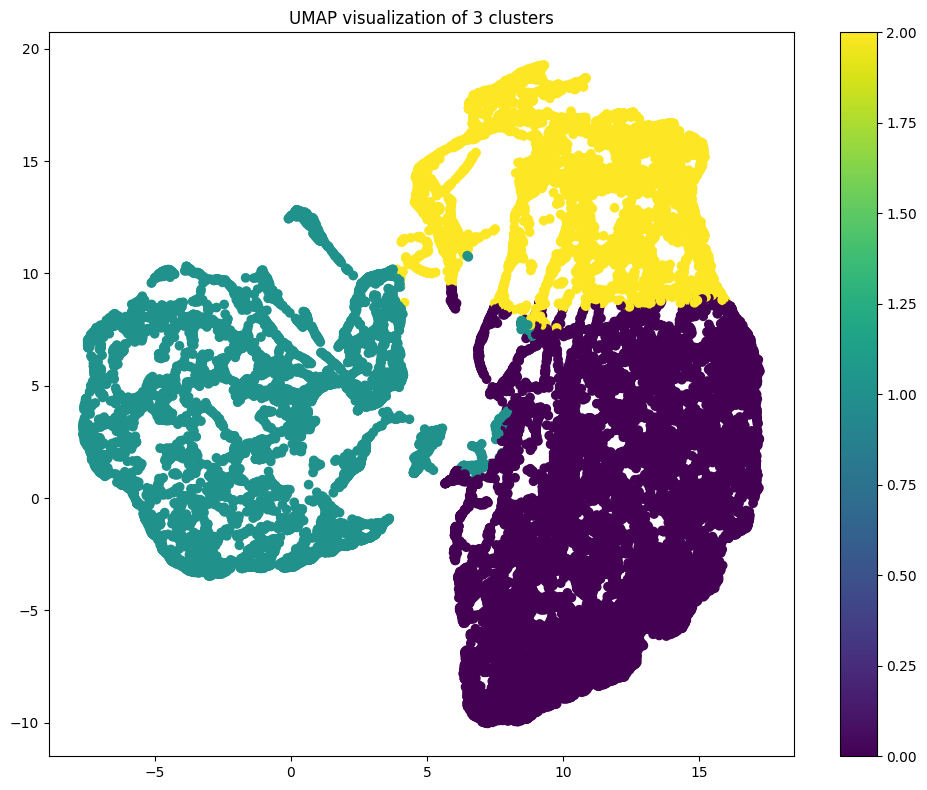

In [157]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, r2_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import umap

# PCA with 95% variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(val_clean)
print(f"PCA components for 95% variance: {X_pca.shape[1]}")

# Clustering with k=3
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
labels = kmeans.fit_predict(X_pca)

# Calculate metrics
silhouette = silhouette_score(X_pca, labels)
calinski = calinski_harabasz_score(X_pca, labels)
davies = davies_bouldin_score(X_pca, labels)
r2 = r2_score(X_pca, kmeans.cluster_centers_[labels])

print(f"Silhouette: {silhouette:.3f}")
print(f"Calinski-Harabasz: {calinski:.2f}")
print(f"Davies-Bouldin: {davies:.2f}")
print(f"R-squared: {r2:.3f}")

# UMAP visualization
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(X_pca)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='viridis')
plt.colorbar(scatter)
plt.title('UMAP visualization of 3 clusters')
plt.tight_layout()
plt.show()

PCA components for 95% variance: 3

k=3:
Silhouette: 0.575
Calinski-Harabasz: 58052.61
Davies-Bouldin: 0.58
SSE: 52179.21
R2: 0.555
Inertia: 52179.21

k=4:
Silhouette: 0.539
Calinski-Harabasz: 57866.48
Davies-Bouldin: 0.74
SSE: 37568.42
R2: 0.591
Inertia: 37568.42

k=5:
Silhouette: 0.507
Calinski-Harabasz: 51413.02
Davies-Bouldin: 0.91
SSE: 32495.09
R2: 0.667
Inertia: 32495.09

k=6:
Silhouette: 0.477
Calinski-Harabasz: 48139.78
Davies-Bouldin: 0.92
SSE: 28313.72
R2: 0.699
Inertia: 28313.72

k=7:
Silhouette: 0.482
Calinski-Harabasz: 45879.41
Davies-Bouldin: 0.92
SSE: 25123.91
R2: 0.772
Inertia: 25123.91

k=8:
Silhouette: 0.440
Calinski-Harabasz: 46138.71
Davies-Bouldin: 0.92
SSE: 21745.28
R2: 0.767
Inertia: 21745.28

k=9:
Silhouette: 0.415
Calinski-Harabasz: 45498.93
Davies-Bouldin: 0.94
SSE: 19490.49
R2: 0.796
Inertia: 19490.49

k=10:
Silhouette: 0.406
Calinski-Harabasz: 44599.09
Davies-Bouldin: 0.92
SSE: 17806.90
R2: 0.806
Inertia: 17806.90


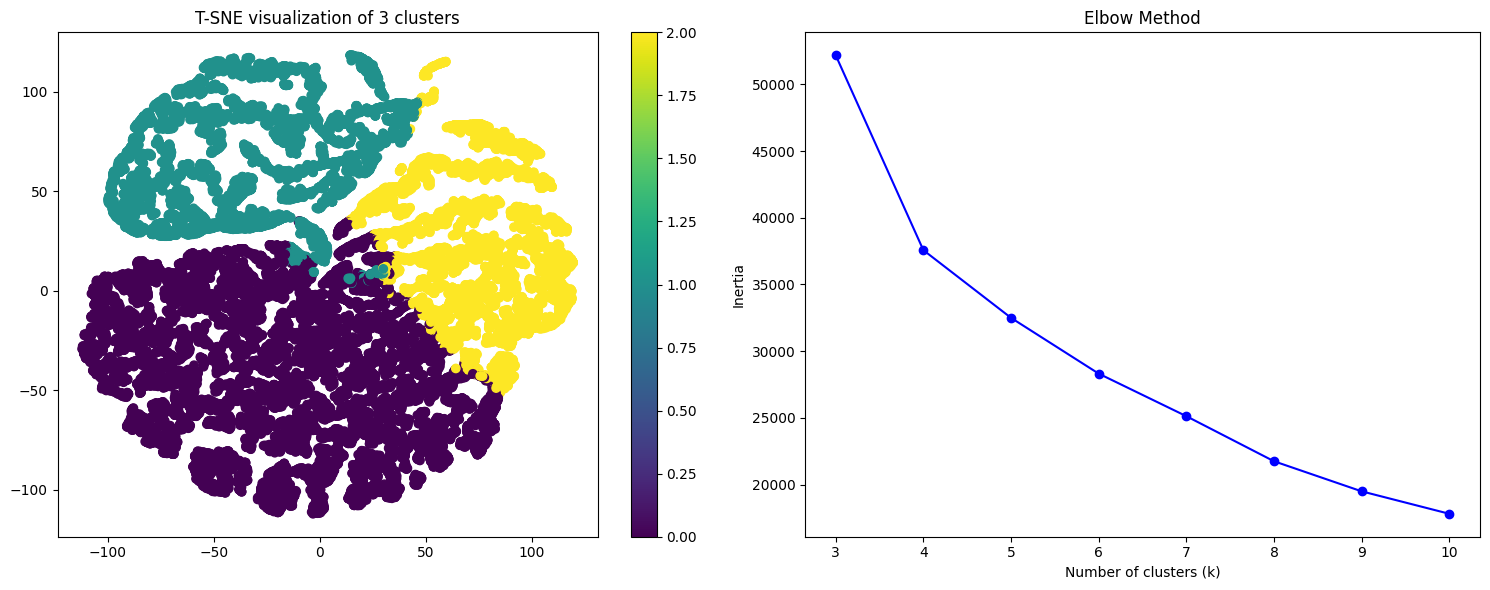

In [159]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, r2_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# PCA with 95% variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(val_clean)
print(f"PCA components for 95% variance: {X_pca.shape[1]}")

# Clustering metrics
metrics = []
for k in range(3, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(X_pca)

    # Calculate SSE
    sse = np.sum((X_pca - kmeans.cluster_centers_[labels]) ** 2)

    # Calculate R2
    r2 = r2_score(X_pca, kmeans.cluster_centers_[labels])

    metrics.append({
        'k': k,
        'silhouette': silhouette_score(X_pca, labels),
        'calinski': calinski_harabasz_score(X_pca, labels),
        'davies': davies_bouldin_score(X_pca, labels),
        'inertia': kmeans.inertia_,
        'sse': sse,
        'r2': r2
    })

# Print metrics
for m in metrics:
    print(f"\nk={m['k']}:")
    print(f"Silhouette: {m['silhouette']:.3f}")
    print(f"Calinski-Harabasz: {m['calinski']:.2f}")
    print(f"Davies-Bouldin: {m['davies']:.2f}")
    print(f"SSE: {m['sse']:.2f}")
    print(f"R2: {m['r2']:.3f}")
    print(f"Inertia: {m['inertia']:.2f}")

# T-SNE visualization
best_k = max(metrics, key=lambda x: x['silhouette'])['k']
kmeans_final = KMeans(n_clusters=best_k, init='k-means++', random_state=42)
labels = kmeans_final.fit_predict(X_pca)

tsne = TSNE(random_state=42)
embedding = tsne.fit_transform(X_pca)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# T-SNE plot
scatter = ax1.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='viridis')
ax1.set_title(f'T-SNE visualization of {best_k} clusters')
plt.colorbar(scatter, ax=ax1)

# Elbow plot
ax2.plot(range(3, 11), [m['inertia'] for m in metrics], 'bo-')
ax2.set_xlabel('Number of clusters (k)')
ax2.set_ylabel('Inertia')
ax2.set_title('Elbow Method')

plt.tight_layout()
plt.show()

In [155]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
import pandas as pd

def analyze_feature_importance(df):
   # Get cluster labels
   kmeans = KMeans(n_clusters=3, random_state=42)
   labels = kmeans.fit_predict(df)

   # Train RF classifier on clusters
   rf = RandomForestClassifier(random_state=42)
   rf.fit(df, labels)

   # Get feature importance
   importance = pd.DataFrame({
       'feature': df.columns,
       'importance': rf.feature_importances_
   }).sort_values('importance', ascending=False)

   return importance

# Run analysis on preprocessed data
importance = analyze_feature_importance(val_clean)
print(importance)

In [219]:
# Run analysis on preprocessed data
importance = analyze_feature_importance(val_clean)
print(importance)

             feature  importance
1    value_retention    0.229820
0          CLV_Score    0.189528
5  spend_consistency    0.163988
4    growth_momentum    0.134321
2       value_growth    0.119854
7  active_spend_rate    0.096921
3  value_growth_rate    0.035400
6    avg_order_value    0.030168


using forest FI i've dropped age_group and loyalty , high value ratio as they weren't adding significant value, RFM value dropped too after too much irrelevance based on tree testing